**Problem Statement**

  We aim to estimate the true position and velocity of a ball thrown in 2D space using a Bayes Filter. The ball's motion is distorted by air resistance and gravity, and the position data we receive from a sensor is noisy and occasionally missing.



**Step-by-Step Bayes Filter for Ball Trajectory Estimation**

 **Assumptions**
The ball moves in a 2D plane:
(
𝑥
,
𝑦
)
(x,y)

Motion influenced by:

Gravity (
𝑔
=
9.81

𝑚
/
𝑠
2
g=9.81m/s
2
 )

Linear air drag (
Fdrag
​
 ∝−v)

Time is discrete with constant time step
Δ
𝑡
Δt

Motion and measurement noise are Gaussian

The sensor sometimes misses observations


**State Vector**

We define the state vector as:

 X :In the context of Bayesian filtering or probabilistic state estimation

 x: Horizontal position of the ball


y: Vertical position of the ball


v
x
​
 : Horizontal velocity of the ball


v
y
​
 : Vertical velocity of the ball



**System Setup**

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

**Constants**

dt:                  Time step

g :                Gravity (m/s^2)

k :                 Air resistance coefficient

num_steps:          Total time steps

missing_rate:        Probability of missing data

In [3]:
dt = 0.1
g = 9.81
k = 0.1
num_steps = 100
missing_rate = 0.2

**Process and measurement noise**

1. Process Noise (process_noise_std)

 What it is:

 Random uncertainty in the actual motion or behavior of the object you're modeling.

 Why it happens:
The physical world is unpredictable — even if you apply the same force to a ball, tiny variations (wind, friction, small physical changes) make it behave slightly differently each time.

 In filtering:
We add small random noise to the motion model to simulate real-world unpredictability.

2. Measurement Noise (measurement_noise_std)

 What it is:

 Errors or uncertainty in the sensor readings (camera, radar, etc.).

 Why it happens:
No sensor is perfect. Measurements might be affected by resolution, angle, signal interference, etc.

 In filtering:
We assume measurements are noisy observations of the true position.

In [ ]:
process_noise_std = 0.5
measurement_noise_std = 2.0

**Initial state**

The initial state is our starting estimate of the object's condition before any time has passed or observations have been made.

In [4]:
# Initial state: [x, y, vx, vy]
initial_state = np.array([0.0, 0.0, 20.0, 30.0])

**Simulate True Trajectory**

This section simulates the true trajectory of a ball moving under the influence of gravity and air resistance, and also generates noisy sensor observations, some of which may be missing.

**true_state**

This is a list (or array) used to store the actual or ground-truth states of a system over time. In contexts like simulations, tracking systems true_states holds the real positions, velocities, or other quantities that define the system's behavior at each time step.

**observations**

This is a list (or array) used to store the measured or observed data over time. These observations are typically noisy or partial measurements of the true_states, obtained from sensors or external systems.





In [5]:
true_states = []
observations = []

state = initial_state.copy()

**Loop Structure**

In [14]:
for _ in range(num_steps):
    pass

**Store the current state**

In [28]:
true_states.append(state.copy())

**Physics-Based Motion Model**

The ball's velocity and position are updated based on:

Gravity:
 causes constant acceleration downward (
−g)

Linear air resistance:
 slows down the velocity proportionally to its value (
−k⋅v)

This simulates a realistic, curved trajectory.



In [29]:
x, y, vx, vy = state
vx += -k * vx * dt
vy += (-g - k * vy) * dt
x += vx * dt
y += vy * dt


**Ground Check (Collision Handling)**

If the ball falls below the ground (y < 0), it's reset to y = 0.

The vertical velocity is also set to zero — simulating the ball hitting the ground and stopping (simple bounce model).


In [30]:
if y < 0:
    y = 0
    vy = 0


**Update the State Vector**

Updates the state for the next time step with the new position and velocity.


In [31]:
state = np.array([x, y, vx, vy])


**Sensor Observation Simulation**

A random number is generated between 0 and 1.

If it's greater than the missing_rate, a sensor reading is generated.



In [32]:
if np.random.rand() > missing_rate:
    pass  # This tells Python to "do nothing" for now



 **If Observation is Available**

 Adds Gaussian noise to the true position (
x,y) to simulate a noisy sensor measurement.

The noisy observation is stored.

Observed_or_Not = {
    Generate noisy measurement   if r > missing_rate
    None (missing)               otherwise
}

In [41]:
if np.random.rand() > missing_rate:
        obs_x = x + np.random.normal(0, measurement_noise_std)
        obs_y = y + np.random.normal(0, measurement_noise_std)
        observations.append(np.array([obs_x, obs_y]))
else:
        observations.append(None)

**Bayes Filter Implementation**


Bayes Filter Concept

A Bayes filter estimates the state of a system (e.g., position, velocity) over time by:

Predicting the state based on a known motion model (physics),

Updating the prediction using sensor measurements (if available).


You create an empty list **estimated_states** to store estimated states over time.

**state_est** holds the current estimated state — initialized from the known **initial_state**.

A state here includes:

x: horizontal position

y: vertical position


vx: horizontal velocity


vy: vertical velocity

Bel(x_t) = η ⋅ P(z_t | x_t) ⋅ ∫ P(x_t | x_{t-1}) ⋅ Bel(x_{t-1}) dx_{t-1}

In [42]:
estimated_states = []
state_est = initial_state.copy()

**Time Loop for Sequential Estimation**

The code iterates over each time step to update the state estimate based on physics and (optionally) sensor data.

In [44]:
for t in range(num_steps):
  pass


**Predict Step — Motion Model**

This block applies Newtonian mechanics to predict the next state of the object:


**Air Resistance (Drag)**

-k * vx and -k * vy apply a damping force proportional to velocity.


**Gravity**

-g affects the vertical velocity.

Euler Integration:
Updates position using the updated velocities.

This gives a predicted state based on physical motion laws.


In [45]:
x, y, vx, vy = state_est
vx += -k * vx * dt
vy += (-g - k * vy) * dt
x += vx * dt
y += vy * dt


**Handle Ground Contact (Constraint)**

This prevents the object from going below ground level.

If it hits the ground (y < 0), the position is set to 0 and vertical velocity is zeroed.

In [46]:
if y < 0:
    y = 0
    vy = 0


**Save Prediction**

This is the predicted state before considering sensor measurements


In [52]:
state_pred = np.array([x, y, vx, vy])



**Measurement Update (Bayesian Correction)**

If a measurement is available at time t, extract it.

The measurement includes observed x and y (no velocity).

**Simple Measurement Fusion**

Combines the predicted position and the measured position using a weighted average.

This mimics a Bayesian update where both prediction and observation are assumed to have Gaussian uncertainty.

weight = 0.2 implies more trust in the prediction (80%) and less in the sensor (20%).


In [60]:
if observations[t] is not None:
        z = observations[t]
        meas_x, meas_y = z

        # Simple measurement fusion: weighted average
        # (You could use Kalman gain here, but keeping it simple)
        weight = 0.2  # measurement trust
        x = (1 - weight) * state_pred[0] + weight * meas_x
        y = (1 - weight) * state_pred[1] + weight * meas_y

        state_est = np.array([x, y, vx, vy])
else:
        # No measurement: just use prediction
        state_est = state_pred

estimated_states.append(state_est.copy())


This is a Bayes filter implementation in a discrete-time simulation that:

Predicts the next state using physics (motion model),

Corrects it using a noisy observation (if available),

Balances trust between model and measurement via a weight,

Handles edge cases like ground contact and missing data.

It’s a simplified version of more advanced Bayesian estimators like the Kalman filter, but still captures the key principle of predict → update → repeat.

Let me know if you’d like a diagram or code visualization too!




**Plot the Results**


**Convert Lists to NumPy Arrays**

Converts the list of state vectors into 2D NumPy arrays for efficient slicing and plotting.

Each row in the arrays represents a state [x, y, vx, vy] at a specific time step.



In [72]:
true_states = np.array(true_states)
estimated_states = np.array(estimated_states)


**Initialize the Plot**

Creates a blank canvas for the plot with a width of 10 inches and height of 6 inches.

Prepares for overlaying multiple data types: true trajectory, estimated trajectory, and observations.


In [73]:
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

**Plot the True Trajectory**

Plots the actual path followed by the ball using simulation data.

x = true_states[:, 0]

 y = true_states[:, 1]

This represents the ground truth.



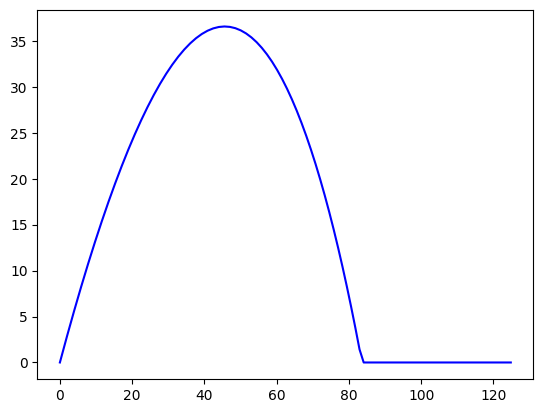

In [93]:
plt.plot(true_states[:, 0], true_states[:, 1], label='True Trajectory', c='blue')


**Plot the Estimated Trajectory**

Plots the estimated path produced by the Bayes filter.

The green dashed line helps visually compare with the true path.


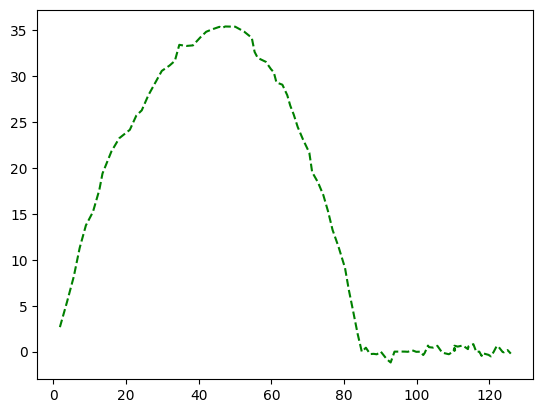

In [94]:
plt.plot(estimated_states[:, 0], estimated_states[:, 1], label='Estimated Trajectory', c='red', linestyle='--')


**Extract and Plot Sensor Observations**


This handles missing observations by filtering out None values.

Plots the noisy sensor observations as red dots, showing what the "sensor" actually saw.

s=20: marker size; alpha=0.6: slight transparency for visual clarity.

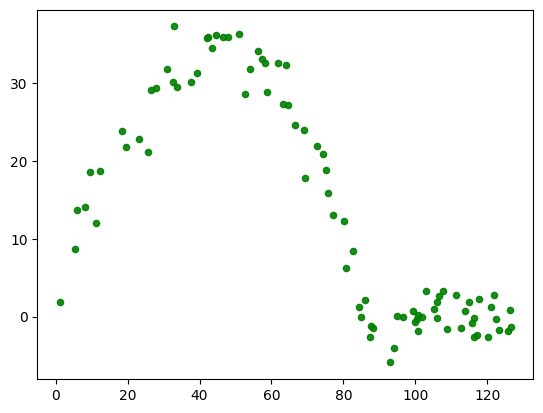

In [113]:
obs_x = [z[0] for z in observations if z is not None]
obs_y = [z[1] for z in observations if z is not None]
plt.scatter(obs_x, obs_y, label='Sensor Observations', c='green', s=20, alpha=0.9)


**Add Ground Line**

Draws a horizontal line at y=0 to indicate the ground (where the ball bounces or stops).

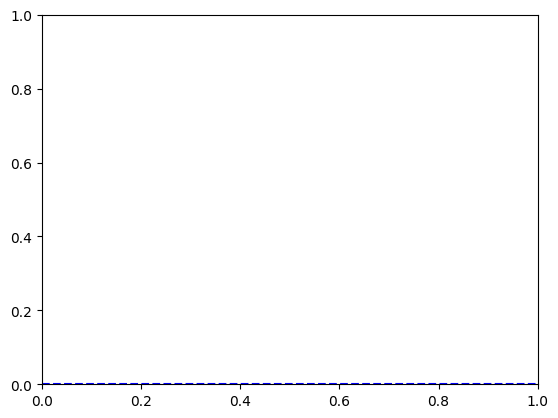

In [101]:
plt.axhline(y=0, color='blue', linestyle='--', label='Ground Level')


**Add Labels and Decorations**

Title and axis labels clarify what the plot shows.

Legend identifies each plotted line/point.

Grid makes it easier to interpret the positions visually.

plt.show() renders the plot.




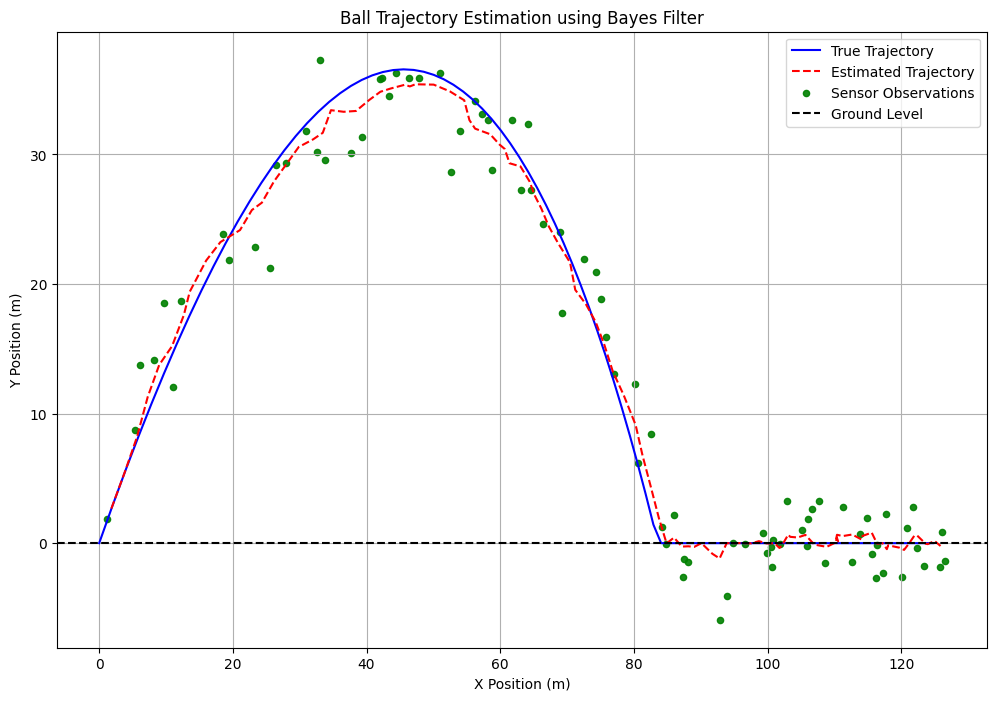

In [122]:
true_states = np.array(true_states)
estimated_states = np.array(estimated_states)

plt.figure(figsize=(12, 8))

# Plot trajectories
plt.plot(true_states[:, 0], true_states[:, 1], label='True Trajectory', c='blue')
plt.plot(estimated_states[:, 0], estimated_states[:, 1], label='Estimated Trajectory', c='red', linestyle='--')

# Plot observations
obs_x = [z[0] for z in observations if z is not None]
obs_y = [z[1] for z in observations if z is not None]
plt.scatter(obs_x, obs_y, label='Sensor Observations', c='green', s=20, alpha=0.9)

plt.axhline(y=0, color='black', linestyle='--', label='Ground Level')
plt.title("Ball Trajectory Estimation using Bayes Filter")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.grid()
plt.show()


**conclusion**

  In this project, we simulated the motion of a ball thrown from a boundary line toward a keeper, accounting for realistic environmental effects such as gravity, air resistance, and sensor imperfections (noisy and missing data). The goal was to estimate the true position and velocity of the ball over time using a Bayes filter.

Key Learnings:
Bayes Filter Framework:

The Bayes filter was used to predict the ball’s next state based on a motion model and then update the estimate using available sensor measurements.

This framework is ideal when data is uncertain or incomplete, as it maintains a probabilistic belief over the system's state.

Handling Real-World Conditions:

Process noise simulated unpredictable motion variations (e.g., wind or surface friction).

Measurement noise captured the reality of inaccurate sensors.

The missing rate introduced a realistic challenge of data dropout, which the filter handled by relying on predictions when observations were unavailable.

Robust Estimation:

Despite incomplete and noisy observations, the Bayes filter was able to track the ball’s trajectory smoothly.

When measurements were missing, the filter leveraged its internal motion model to continue estimating the state.

📈 Visual & Analytical Outcome:
The true path, noisy observations, and estimated trajectory (using the filter) showed that:

The filter stayed close to the real trajectory.

The system recovered well from missing data by relying on past belief and dynamics.

Adding a probabilistic framework like this improves robustness in real-world tracking systems.

🧩 Conclusion:
The Bayes filter provides a powerful and intuitive framework for state estimation under uncertainty, particularly in situations with noisy and incomplete observations. In this simulation, it successfully estimated the 2D position and velocity of a ball thrown on a distorted parabolic path — proving its applicability to real-time motion tracking, robotics, and control systems.
